[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/KrishnaRohithVemulapalli/Decision-Tree/blob/main/CreditRiskAnalysis/CreditRisk.ipynb)

# Predicting Loan Default with Simplified Features

[link_forData](https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    accuracy_score,precision_score,recall_score
)
from sklearn.tree import DecisionTreeClassifier


# from sklearn.ensemble import (
#     RandomForestClassifier,
#     GradientBoostingClassifier,
#     AdaBoostClassifier,
# )
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier

**Importing a csv file**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/KrishnaRohithVemulapalli/DataSets/main/credit_risk.csv")
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

Replacing nan values with mean





In [4]:
df.shape

(32581, 12)

In [5]:
df["Emp_length"]=df["Emp_length"].fillna(df["Emp_length"].mean())

In [6]:
df["Rate"]=df["Rate"].fillna(df["Rate"].mean())

In [7]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Hypothesis Testing with T-test to check signifiance difference between in income between default and non-defaulters

In [8]:
g1=df[df["Default"]=="Y"]["Income"]
g2=df[df["Default"]=="N"]["Income"]

In [9]:
t_stat,p_value=stats.ttest_ind(g1,g2)
print("Test Statistics :" ,t_stat)
print("P value :" ,p_value)
if p_value < 0.05:
    print("There is a significant difference in income between defaulters and non-defaulters.")
else:
    print("There is no significant difference in income between defaulters and non-defaulters.")

Test Statistics : -0.652221442811845
P value : 0.514262930483792
There is no significant difference in income between defaulters and non-defaulters.


**T-test Confindence Interval of Income,Rate,Age**

In [10]:
confidence_interval_income = stats.t.interval(0.95, len(df['Income']) - 1, loc=np.mean(df['Amount']), scale=stats.sem(df['Amount']))
confidence_interval_rate = stats.t.interval(0.95, len(df['Rate']) - 1, loc=np.mean(df['Rate']), scale=stats.sem(df['Rate']))
confidence_interval_age = stats.t.interval(0.95, len(df['Rate']) - 1, loc=np.mean(df['Age']), scale=stats.sem(df['Age']))
print(confidence_interval_income)
print(confidence_interval_rate)
print(confidence_interval_age)

(9520.720801926094, 9658.021409792393)
(10.978232350436636, 11.045157434053438)
(27.665667376675252, 27.803532463722526)


**Central Limit Theorum**


95% confidence interval for age: (27.665669937555084, 27.803529902842694)


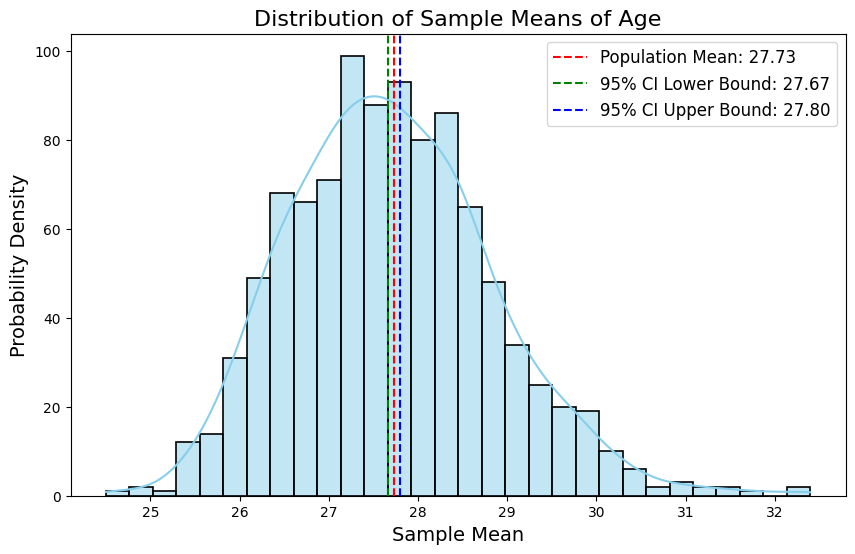

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_means = []
sample_size = 30

for _ in range(1000):
    sample = np.random.choice(df["Age"], size=sample_size, replace=True)
    sample_means.append(sample.mean())
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Distribution of Sample Means of Age", fontsize=16)
plt.xlabel("Sample Mean", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)

population_mean = df["Age"].mean()
from scipy.stats import norm

confidence_level = 0.95
sample_mean = df['Age'].mean()
sample_std = df['Age'].std()
sample_size = len(df['Age'])

margin_of_error = norm.ppf((1 + confidence_level) / 2) * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"95% confidence interval for age: {confidence_interval}")

confidence_interval = (population_mean - margin_of_error, population_mean + margin_of_error)
plt.axvline(population_mean, color='red', linestyle='--', label=f'Population Mean: {population_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower Bound: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='blue', linestyle='--', label=f'95% CI Upper Bound: {confidence_interval[1]:.2f}')
plt.legend(fontsize=12)
plt.show()

In [12]:
data= pd.get_dummies(df, columns=['Home', 'Intent'])


In [13]:
data=data.drop(columns=["Id"])

In [14]:
data.columns

Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Default', 'Cred_length', 'Home_MORTGAGE',
       'Home_OTHER', 'Home_OWN', 'Home_RENT', 'Intent_DEBTCONSOLIDATION',
       'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL',
       'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')

**Perform ANOVA to test if there's a significant difference in loan amounts among different home ownership statuses.**

In [15]:
from scipy.stats import f_oneway
loan_amt_own=data[data['Home_OWN']==1]["Amount"]
loan_amt_mortage=data[data["Home_MORTGAGE"]==1]["Amount"]
loan_amt_rent=data[data["Home_RENT"]==1]["Amount"]

f_stat,p_value=f_oneway(loan_amt_own,loan_amt_mortage,loan_amt_rent)

print("Test Statistics :",f_stat)
print("P-value :",p_value)
if p_value < 0.05:
    print("There is a significant difference in loan amounts among different home ownership statuses.")
else:
    print("There is no significant difference in loan amounts among different home ownership statuses.")


Test Statistics : 286.9814247253823
P-value : 2.8462280727625955e-124
There is a significant difference in loan amounts among different home ownership statuses.


**Changing default column a cateogrical vaiable into numeric**

In [16]:
data["Default"]=data["Default"].map({"Y":1,"N":0})

**Changing Data type columns format into float**

In [17]:
data["Home_MORTGAGE"]=data["Home_MORTGAGE"].astype(float)

In [18]:
data.columns

Index(['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Status',
       'Percent_income', 'Default', 'Cred_length', 'Home_MORTGAGE',
       'Home_OTHER', 'Home_OWN', 'Home_RENT', 'Intent_DEBTCONSOLIDATION',
       'Intent_EDUCATION', 'Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL',
       'Intent_PERSONAL', 'Intent_VENTURE'],
      dtype='object')

In [19]:
para = ["Home_OTHER", "Home_OWN", "Home_RENT", "Home_MORTGAGE", "Intent_DEBTCONSOLIDATION",
        "Intent_EDUCATION", "Intent_HOMEIMPROVEMENT", "Intent_MEDICAL", "Intent_PERSONAL", "Intent_VENTURE"]

# Iterate through each column in the 'para' list and convert its values to float
for i in para:
    data[i] = data[i].astype(float)

**Train test split**

In [20]:
X=data.drop("Default",axis=1)
y=data["Default"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
res={
    "Model Name":type(model).__name__,
    "Accuracy":accuracy_score(y_train,y_pred),
    "Precision":precision_score(y_train,y_pred),
    "Recall":recall_score(y_train,y_pred)
}


res

{'Model Name': 'DecisionTreeClassifier',
 'Accuracy': 0.9995615188985355,
 'Precision': 1.0,
 'Recall': 0.997504367357125}

In [28]:
#Now using Decision Tree Classifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import f1_score
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [30]:
precision,recall,accuracy,f1

(0.48488241881298993,
 0.4982738780207135,
 0.8166751918158568,
 0.49148694665153236)

<Axes: >

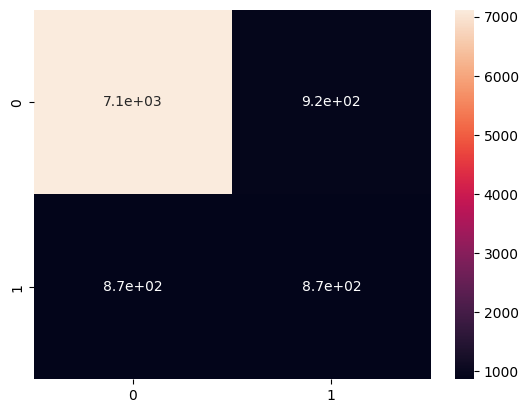

In [31]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

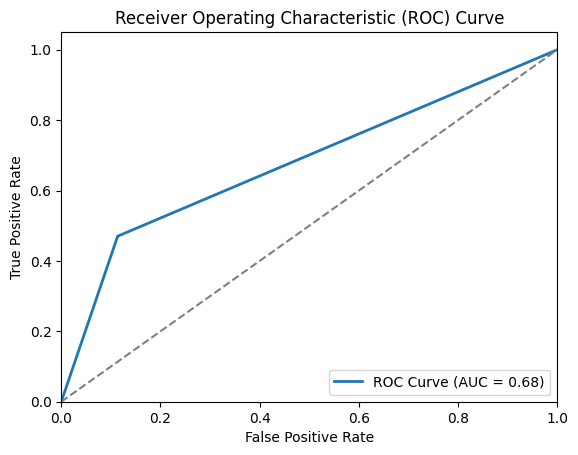

In [26]:

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, lw=2, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




Plotting a decision Tree

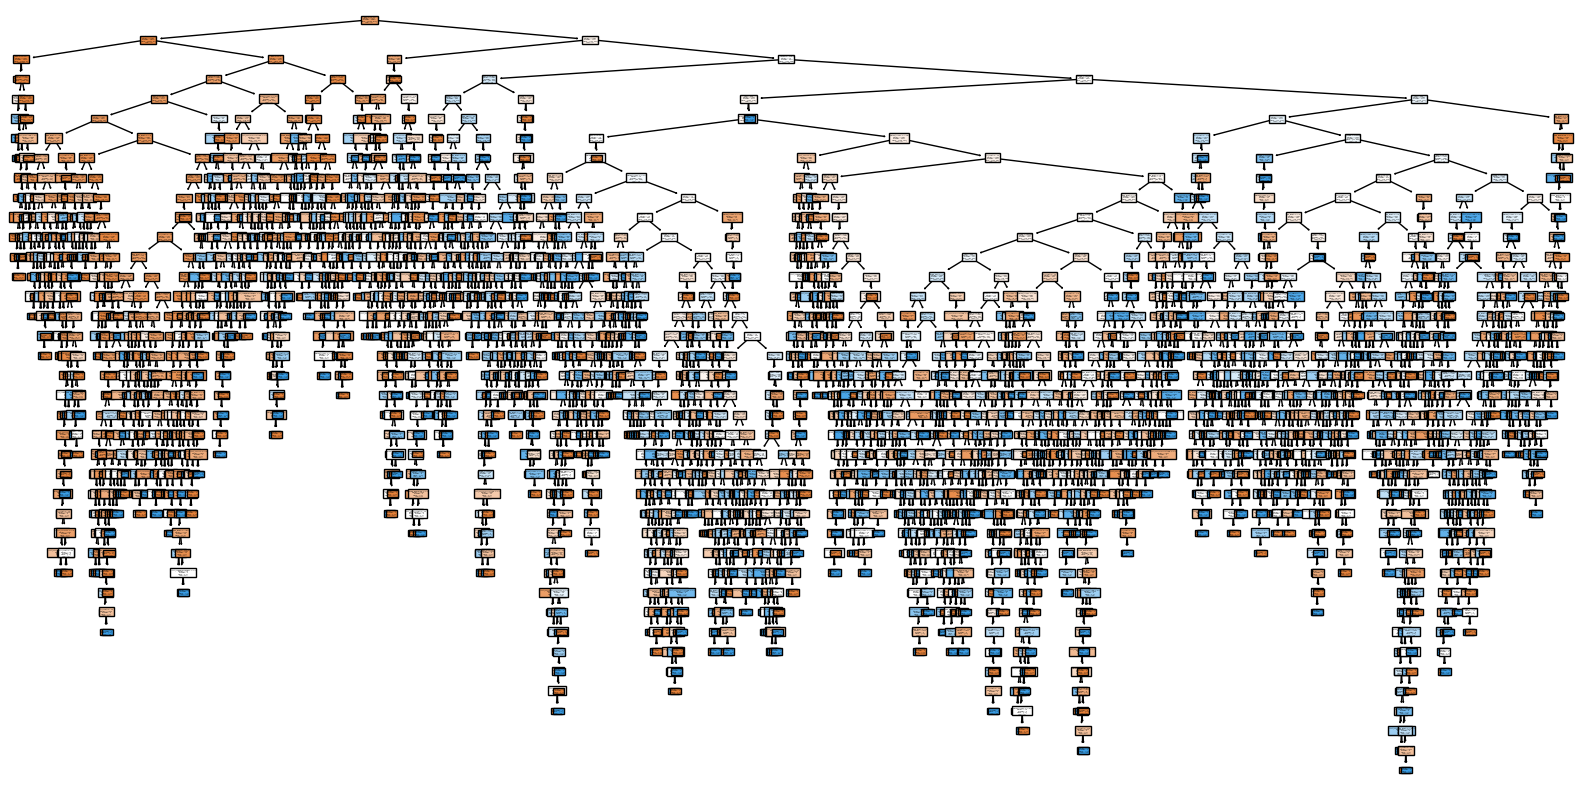

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()